In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from astropy.coordinates import SkyCoord
from astropy import units as u
import peakutils

#import aplpy
from astropy.io import fits
import astropy.wcs as wcs

from astropy.time import Time as aTime

import datetime as dt, time

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
with open('rfc_2023b.txt') as w:
    rfc2023b = np.array([s.split() for s in w.readlines()[211:]])
    
r = rfc2023b[:,(0,2,3,6,9,10,11,12,15,16,17,18)]

ra_hms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
dc_dms = np.zeros(shape=rfc2023b.shape[0]).astype(str)
for i in range(rfc2023b.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(rfc2023b[i,3],rfc2023b[i,4],rfc2023b[i,5])
    dc_dms[i]= '{}d{}m{}s'.format(rfc2023b[i,6],rfc2023b[i,7],rfc2023b[i,8])
    
r[:,2] = ra_hms
r[:,3] = dc_dms

R = pd.DataFrame(r,columns=['G','Name','RA','DEC','xerr','yerr','xyc','obs','C','Cures','X','Xures'])

In [20]:
#t1 = SkyCoord('18h40m34.51s -04d57m14.4s')
#t1 = SkyCoord('18h41m51.06s -05d01m43.5s') 
#t1 = SkyCoord('18h34m36.84s -08d01m00.7s') #g023
#t1 = SkyCoord('18h30m36.07s -10d07m10.9s') #g027.50
#t1 = SkyCoord('16:41:06.05 -47:07:02.5',unit=(u.hourangle,u.degree))  #g031.12
t1 = SkyCoord('15:00:55 -58:58:52',unit=(u.hourangle,u.degree))  	#g318

c = SkyCoord(ra_hms,dc_dms)

sep1 = (c.separation(t1).value < 6.0)

In [21]:
indx  = (R['X'].astype(float) > .07)*sep1
c1    = c[indx]
names = r[indx,1]

In [22]:
names, c.separation(t1).value[indx]

(array(['J1417-5950', 'J1442-5407', 'J1450-5614', 'J1456-5441',
        'J1456-5618', 'J1503-6425', 'J1511-6319', 'J1512-5640',
        'J1515-5559', 'J1537-5830', 'J1542-5838'], dtype='<U10'),
 array([5.55931995, 5.46779056, 3.06278621, 4.33690365, 2.74818263,
        5.45753105, 4.51926646, 2.80559844, 3.55157808, 4.72486804,
        5.4222587 ]))

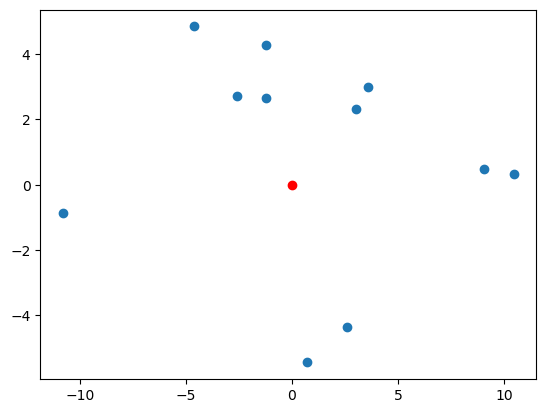

In [24]:
'''imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax   = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='k',zorder=99);

for i in range(len(names)):
    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])'''

fig, ax = plt.subplots(1)
ax.plot(c[indx].ra.deg - t1.ra.deg,c[indx].dec.deg - t1.dec.deg,'o')
ax.plot(0,0,'ro')
ax.

In [9]:
R[(R['X'].astype(float) > .07)*sep1]

,G,Name,RA,DEC,xerr,yerr,xyc,obs,C,Cures,X,Xures
13921,C,J1450-5614,14h50m35.0,-56d14m52.,1.79,0.69,-0.505,43,-1.00,-1.00,0.162,0.095
14007,C,J1456-5441,14h56m03.6,-54d41m42.,0.42,0.37,0.146,79,-1.00,-1.00,0.085,0.082
14008,C,J1456-5618,14h56m04.2,-56d18m37.,0.64,0.37,0.099,48,-1.00,-1.00,0.100,0.064
14248,C,J1511-6319,15h11m16.1,-63d19m31.,3.26,1.18,0.006,31,-1.00,-1.00,0.113,0.073
14276,C,J1512-5640,15h12m55.8,-56d40m30.,0.79,0.37,0.166,106,-1.00,-1.00,0.571,0.290
14313,C,J1515-5559,15h15m12.6,-55d59m32.,0.21,0.15,-0.145,190,-1.00,-1.00,1.466,0.978
14623,C,J1537-5830,15h37m10.8,-58d30m10.,1.08,0.44,0.168,60,-1.00,-1.00,0.083,0.107


In [50]:
t = np.arange(10,60,1)
rms = 1.2*np.sqrt(3500*550)/np.sqrt(2*2*128e6*t)*1000

Text(0, 0.5, 'rms (mJy)')

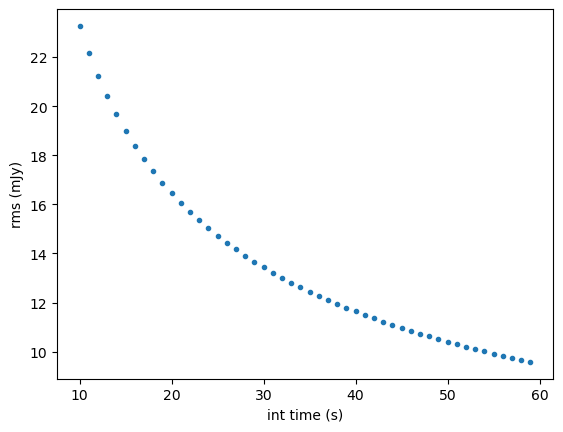

In [51]:
fig, ax = plt.subplots(1)
ax.plot(t,rms,'.')
ax.set_xlabel('int time (s)')
ax.set_ylabel('rms (mJy)')

In [199]:
c.separation(t1).value[(R[8].astype(float) > .07)*sep1]

array([4.82691179, 4.57491038, 3.30933333, 2.49649015, 3.90668145,
       4.61729572, 4.84554331, 4.58876695, 4.96421352])

In [239]:
#with open('icrf3.txt') as w:
#    icrf3 = [s.split() for s in w.readlines()[22:]]

In [261]:
icrf3 = pd.read_fwf('icrf3.txt',skiprows=22).values

In [265]:
ra_hms = np.zeros(shape=icrf3.shape[0]).astype(str)
dc_dms = np.zeros(shape=icrf3.shape[0]).astype(str)
for i in range(icrf3.shape[0]):
    ra_hms[i]= '{}h{}m{}s'.format(icrf3[i,4],icrf3[i,5],icrf3[i,6])
    dc_dms[i]= '{}d{}m{}s'.format(icrf3[i,7],icrf3[i,8],icrf3[i,9])

In [266]:
ICRF3 = SkyCoord(ra_hms,dc_dms)

In [294]:
I1 = ICRF3[ICRF3.separation(t1).value<3]

In [295]:
c1 = c[c.separation(t1).value<3]

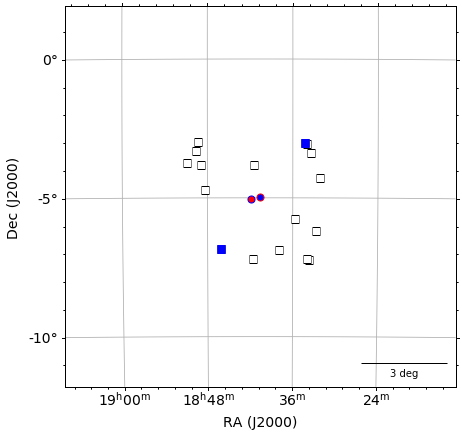

In [296]:
imgpath = '/Users/Lucas/fits/1131m167_ac51-w1-int-3.fits'
hdu = fits.getheader(imgpath)
w = wcs.WCS(imgpath).celestial

n = 35
w.array_shape = (1024*n-1,1024*n-1)
w.wcs.crpix = np.array([(w.array_shape[0]+1)/2,(w.array_shape[0]+1)/2])
w.wcs.crval = np.array([t1.ra.value,t1.dec.value])

srcs = c[:6]

#xoffs = [-2.2, 2.2,-2.2, 2.2, 2.2,-2.2]
#yoffs = [ 0, 0, 0, 0, 0, 0]

fig1 = plt.figure(figsize=(7,7));
ax = aplpy.FITSFigure(w, figure=fig1,convention='calabretta')

ax.axis_labels.set_font(size='14')
ax.tick_labels.set_font(size='14');

ax.ax.grid(True)
ax.add_scalebar(3*u.deg,'3 deg')

ax.show_markers(t1.ra.deg,t1.dec.deg,s=50,marker='o',
                edgecolor='red',linewidth=1,fc='blue',zorder=99)
ax.show_markers(t2.ra.deg,t2.dec.deg,s=50,marker='o',
                edgecolor='blue',linewidth=1,fc='red',zorder=99)

ax.show_markers(c1.ra.deg,c1.dec.deg,s=50,
                marker='s',edgecolor='k',linewidth=0.5,fc='w',zorder=99);

ax.show_markers(I1.ra.deg,I1.dec.deg,s=50,
                marker='s',edgecolor='b',linewidth=0.5,fc='b',zorder=99);

#for i in range(len(names)):
#    ax.add_label(c1[i].ra.deg,c1[i].dec.deg+0.5,names[i])


In [58]:
icrf3[ICRF3.separation(t1).value<3,2]

NameError: name 'icrf3' is not defined

In [55]:
from astropy.time import Time as aTime
import numpy as np

with open('loop.txt','r+') as w:
    times = np.array(w.readlines())



In [59]:
(np.diff(aTime([datetime.datetime.strptime(s,'%H:%M:%S\n') for s in times]).mjd)*86400/60)

array([    3.98333333,     4.        ,     4.01666667,     4.03333333,
           4.06666667,     4.08333333,     4.13333333,     4.21666667,
           4.28333333,     4.38333333,     4.46666667,     4.56666667,
           4.66666667,     4.78333333,     4.9       ,     5.01666667,
           5.13333333,     5.28333333,     5.36666667,     5.43333334,
           5.45      ,     5.38333333,     5.28333333,     5.21666667,
           5.16666667,     5.1       ,     5.01666667,     4.91666667,
           4.8       ,     4.71666667,     4.61666667,     4.51666666,
           4.43333334,     4.35      ,     4.28333333,     4.25      ,
           4.25      ,     4.28333333,     4.28333333,     4.31666667,
           4.31666667,     4.35      ,     4.36666667,     4.38333333,
           4.38333333,     4.45      ,     4.46666667,     4.51666667,
           4.55      ,     4.6       ,     4.6       ,     4.65      ,
           4.66666667,     4.66666667,     4.7       ,     4.73333333,
      

In [5]:
t1 = SkyCoord('16:41:06.05 -47:07:02.5',unit=(u.hourangle,u.degree)) 

In [27]:
with open('FringeFindersSpirals.txt','r+') as w:
    ffs = np.array([s.split()[0:3] for s in w.readlines()[6:]])

In [48]:
((ffs[:,1:3].astype(float) - [t1.ra.deg,t1.dec.deg])**2).sum(1)**0.5

array([180.23888461, 166.32570696, 165.59312037, 160.94847277,
       123.62850206, 124.0489553 , 109.81314179,  83.40540557,
        74.05795821,  69.78303633,  57.18416514,  33.66580089,
        36.43007796,  46.04905264,  46.22214837,  44.67012633,
       135.81822191, 134.77654842, 130.49556638, 128.14523218,
       126.19160954, 118.38852197, 117.414585  , 117.61147027,
       114.53296622, 109.8131418 , 106.00736778,  98.76824779,
        96.58554157,  90.80943566,  89.84084658,  89.63921167,
        87.73806773,  86.12979985,  81.27985403,  78.15118805,
        79.19421974,  76.27069544,  75.27292989,  66.13636947,
        60.66728941,  61.61509717,  54.99016873,  48.91784227,
        48.8596312 ,  49.23086494,  45.55288782,  23.27793134,
        24.02559694,  21.61948271,  23.23427332,  17.80569038,
        17.99737428,  16.31217604,   9.4620205 ,  10.48549131,
        13.11279691,  15.07072028,  14.21482391,  17.55108014,
         4.29360536,  21.512678  ,  10.59111657,  21.70